In [2]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from openff.units import unit
import seaborn as sb
from scipy import stats
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from chargecraft.storage.storage import MoleculePropStore
from rdkit.Chem import AllChem

def equalityline(x, y, ax = None, **kwargs):
    x0, x1 = min(x), max(x)
    y0, y1 = min(y), max(y)
    lims = [min(x0, y0), max(x1, y1)]
    ax = ax or plt.gca()
    ax.plot(lims, lims, **kwargs)

def m(x, y, ax = None, **kwargs):
    
    x = np.array(x)
    y = np.array(y)
    ax = ax or plt.gca()
    m =(np.sum((x - y)**2, axis=0)/(y.shape[0]))**0.5
    ax.annotate(f'$RMSE= {float(m):.2f}$',
                xy=(.01, .99), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')   
    
def kde(x, y, ax = None, **kwargs):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        x = np.array(x)
        y = np.array(y)
    ax = ax or plt.gca()
    kernel = stats.gaussian_kde(x)(y)
    ax.scatter(x, y, c=kernel, s=5)

In [3]:
parquet = "/mnt/storage/nobackup/nca121/paper_charge_comparisons/async_chargecraft_more_workers/compare_fda_drugs/fda_drugs_comparison.parquet"
df = pd.read_parquet(parquet)
df

,am1bcc_charges,am1bcc_dipole,mol_id,charge_model_charges,charge_model_dipoles,charge_model_esp,charge_model_esp_rmse,dipole_model_charges,dipole_model_dipoles,dipole_model_esp,...,esp_model_charges,esp_model_dipoles,esp_model_esp,esp_model_esp_rmse,molecule,grid,geometry,conformer_no,smiles,energy
0,"[-0.11733333333333335, -0.12633333333333335, 0...",0.984904,a3a8dbef357823e19effae02679136f0a73fb43aacfed7...,"[-0.2393501102924347, -0.449552059173584, 0.84...",1.377313,None,NaN,"[-0.22086648643016815, -0.48414021730422974, 0...",1.019288,None,...,"[-0.23057658970355988, -0.4389609694480896, 0....",1.055032,None,NaN,[C:1]([C:2]([C:3](=[O:4])[O:5][H:12])([H:10])[...,None,"[0.4816105356331677, -0.28031156018474457, 0.4...",NaN,[H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([...,NaN
1,"[-0.08507064705882351, -0.05197064705882351, -...",0.618716,758d7e8e46c0ce798a32442ca33e30bbd9129975aabe84...,"[-0.4611971378326416, 0.12370888143777847, -0....",0.719340,None,NaN,"[-0.4694651663303375, 0.14103955030441284, -0....",0.766993,None,...,"[-0.47399625182151794, 0.11448043584823608, -0...",0.680456,None,NaN,[C:1]([C:2]12[C:3]([H:17])([H:18])[C:4]3([H:19...,None,"[-1.6229227534450812, 2.1964971766021044, -0.8...",NaN,[H][N]([H])[C]12[C]([H])([H])[C]3([H])[C]([H])...,NaN
2,"[-0.15095454545454545, -0.09395454545454547, -...",2.740803,8be5e491a7ff7516c5a8900cb1ff02255ba0a92c2ffd9d...,"[-0.17944851517677307, -0.08289095014333725, -...",2.612087,None,NaN,"[-0.16700810194015503, -0.08650045096874237, -...",2.367650,None,...,"[-0.1790674775838852, -0.09176412969827652, -0...",2.258414,None,NaN,[c:1]1([H:15])[c:2]([H:16])[c:3]([H:17])[c:4]2...,None,"[-2.3019895628857534, 1.66089883668639, 0.0488...",NaN,[H][c]1[c]([H])[c]([H])[c]2[c]([c]1[H])[O][N]=...,NaN
3,"[-0.09209996666666667, 0.2392000333333333, -0....",0.571263,034077fddb72c16e12a0fde8979346928e5ec29ff061ec...,"[-0.492931604385376, 0.23280927538871765, -0.3...",0.927918,None,NaN,"[-0.5102951526641846, 0.19728167355060577, -0....",0.566692,None,...,"[-0.4913420081138611, 0.17633934319019318, -0....",0.521898,None,NaN,[C:1]([C:2]1([H:17])[O:3][C@:4]2([C:5]([H:18])...,None,"[-3.5563456356455, 1.1691259459312888, -0.1504...",NaN,[H][C]([H])([H])[C]1([H])[O][C@@]2([C]([H])([H...,NaN
4,"[-0.5947615384615385, 0.10943846153846153, 0.1...",3.288157,566174b47759b043fbba40dce66b6df1f708ee1622a5de...,"[-0.6018080115318298, 0.008493239060044289, 0....",3.589107,None,NaN,"[-0.506907045841217, 0.009318884462118149, 0.0...",3.003158,None,...,"[-0.5137855410575867, 0.027367766946554184, 0....",2.829261,None,NaN,[O:1]([C:2]([C@:3]1([H:20])[S:4][C:5]([H:21])(...,None,"[3.761421121248035, 1.9993313833969324, -0.660...",NaN,[H][O][C]([H])([H])[C@@]1([H])[O][C@@]([H])([N...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,"[0.15611280769230768, -0.7295871923076923, 0.1...",3.685225,63f8c63c173f2ca192b9d7571cf20211a4b61efdb338b3...,"[-0.20545594394207, -0.34321969747543335, -0.0...",5.082970,None,NaN,"[-0.1852550208568573, -0.28878119587898254, 0....",4.173768,None,...,"[-0.2019912153482437, -0.23909546434879303, -0...",4.719739,None,NaN,[C:1]([N:2]1[C:3]([H:47])([H:48])[C:4]([H:49])...,None,"[5.640870321924549, -4.625266255092486, -1.255...",NaN,[H][C]([H])=[C]([F])[C](=[O])[N]1[C]([H])([H])...,NaN
368,"[-0.09710001666666666, -0.06270001666666666, -...",2.341712,05e9b7c578601ce993c6d74b7239c7c717f7db01068e0c...,"[-0.4469262957572937, 0.006687296088784933, -0...",4.568011,None,NaN,"[-0.4563760757446289, -0.02422861009836197, -0...",2.914931,None,...,"[-0.44934216141700745, 0.004074340686202049, -...",3.114657,None,NaN,[C:1]([C:2]([C:3]([H:58])([H:59])[H:60])([C:4]...,None,"[7.753327673145019, 3.1145625523434495, -1.939...",NaN,[H][O][C](=[O])[C]1([H])[C]([C]([H])([H])[H])(...,NaN
369,"[0.11169339735099337, -0.42160660264900657, 0....",2.929461,70223a5b807eaba1e585e6e68809a075f07fdaf3bcb3ff...,"[-0.09721212834119797, -0.3443153202533722, 0....",2.941506,None,NaN,"[-0.09

In [8]:
first_row = df.iloc[0]
first_row

am1bcc_charges           [-0.11733333333333335, -0.12633333333333335, 0...
am1bcc_dipole                                                     0.984904
mol_id                   a3a8dbef357823e19effae02679136f0a73fb43aacfed7...
charge_model_charges     [-0.2393501102924347, -0.449552059173584, 0.84...
charge_model_dipoles                                              1.377313
charge_model_esp                                                      None
charge_model_esp_rmse                                                  NaN
dipole_model_charges     [-0.22086648643016815, -0.48414021730422974, 0...
dipole_model_dipoles                                              1.019288
dipole_model_esp                                                      None
dipole_model_esp_rmse                                                  NaN
esp_model_charges        [-0.23057658970355988, -0.4389609694480896, 0....
esp_model_dipoles                                                 1.055032
esp_model_esp            

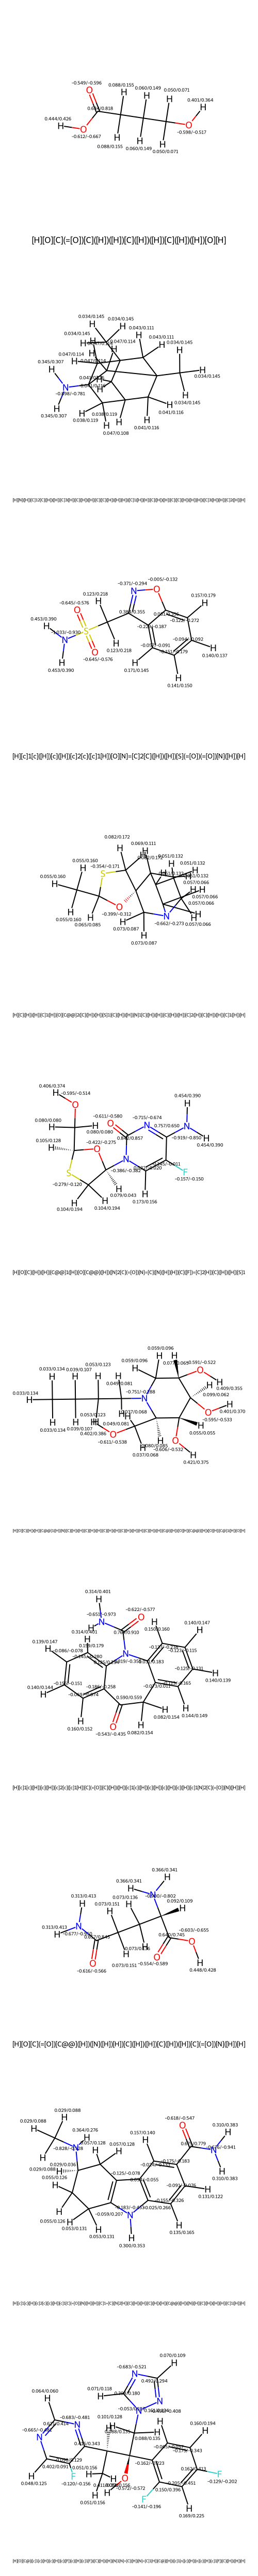

In [12]:
# openff_mol =  Molecule.from_mapped_smiles(first_row['molecule'])
# openff_mol.add_conformer(first_row['geometry'].reshape(-1,3)*unit.angstrom)
# rdkit_mol = openff_mol.to_rdkit()

def label_rdkit(molecule, charges_am1bcc, esp_model_charges):
    AllChem.Compute2DCoords(molecule)

    for i, atom in enumerate(molecule.GetAtoms()):
        if atom.GetTotalDegree() > 3:
            continue
        lbl = '%.3f' % (charges_am1bcc[i]) + '/%.3f' % (esp_model_charges[i])
        atom.SetProp('atomNote', lbl)
    return molecule

rows_to_analyse = df.iloc[:10]
rdkit_molecules = []
labels = []

for row in rows_to_analyse.iterrows():
    row = row[-1]
    tagged_smiles = row['molecule']
    openff = Molecule.from_mapped_smiles(tagged_smiles, allow_undefined_stereo=True)
    geometry = row['geometry'].reshape(-1,3) * unit.angstrom
    openff.add_conformer(geometry)
    resp_mol = openff.to_rdkit()
    mol_labelled = label_rdkit(resp_mol, row['am1bcc_charges'], row['esp_model_charges'])
    labels.append(row['smiles'])
    rdkit_molecules.append(mol_labelled)


Draw.MolsToGridImage(rdkit_molecules, molsPerRow=1, legends=labels, subImgSize=(500,500))